In [7]:
import numpy as np
from plotter_lib import *
import json

In [8]:
Xc = json.load( open("Xc_g2t1.json","r") )

r0 = np.loadtxt("edgelists/red_optima.edgelist", dtype=str)

r1 = np.loadtxt("edgelists/red_optima_truncada_p10.edgelist", dtype=str)


In [9]:
def get_red(r0):

    red0={}
    for link in sorted(r0, key= lambda u: int(u[2]), reverse=True):
        p1,p2, w = link[0],link[1],int(link[2])
        red0[(p1,p2)]= w


    return (red0)


red0=get_red(r0)
red1=get_red(r1)


In [10]:
nor0 = sum(red0.values())
nor1 = sum(red1.values())

In [11]:
s0, s1 = set(red0.keys()), set(red1.keys()) 

links= s0.intersection(s1)


for link in links:

    c10 = red1[link]-red0[link]

    if c10 !=1:
        print (link, c10)

('Player7', 'Player4') -1
('Player6', 'Player2') 0
('Player7', 'Player9') 0
('Player5', 'Player9') 0
('Player7', 'Player3') 0
('Player3', 'Player9') -1
('Player8', 'Player3') 0
('Player2', 'Player6') 0
('Player4', 'Player6') 0
('Player7', 'Player5') -1
('Player5', 'Player4') 0
('Player3', 'Player4') -6
('Player2', 'Player7') 0
('Player4', 'Player7') 0
('Player5', 'Player3') 0
('Player6', 'Player7') -1
('Player1', 'Player9') -4
('Player4', 'Player8') 0
('Player6', 'Player8') 0
('Player3', 'Player5') 0
('Player2', 'Player1') 4
('Player4', 'Player1') 0
('Player1', 'Player4') -3
('Player6', 'Player1') -1
('Player9', 'Player4') 0
('Player8', 'Player6') 0
('Player1', 'Player5') -3
('Player9', 'Player3') 0
('Player7', 'Player8') 0
('Player8', 'Player7') -1
('Player5', 'Player6') 0
('Player2', 'Player9') -2
('Player4', 'Player9') 0
('Player3', 'Player6') -3
('Player1', 'Player2') -7
('Player6', 'Player9') 0
('Player5', 'Player7') 0
('Player2', 'Player4') -1
('Player3', 'Player7') -2
('Player6'

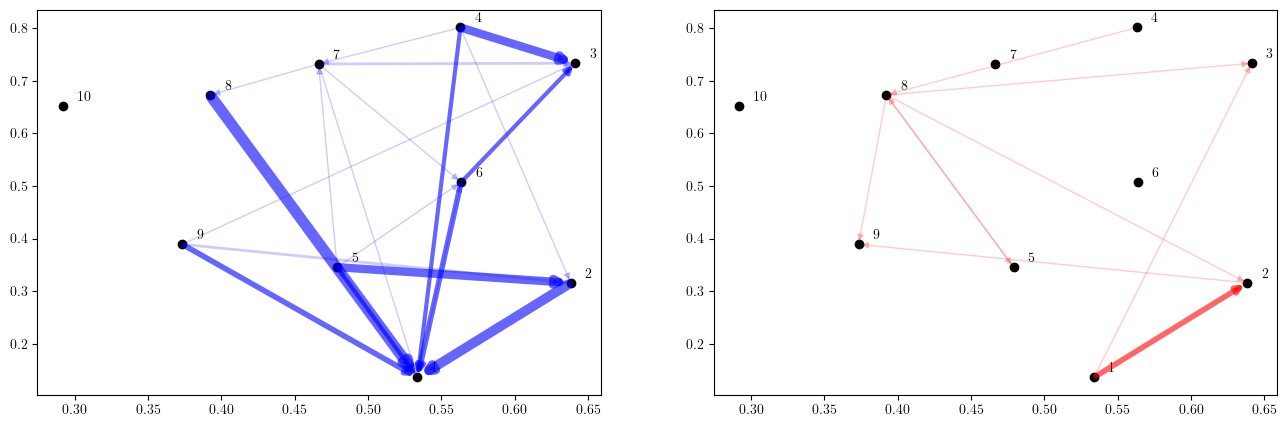

In [12]:

aux=[]
for link in links:

    #c10 = 100*((red0[link]/nor0)-(red1[link]/nor1))
    c10 = red0[link]- red1[link]

    if c10 !=0:
        aux.append(abs(c10))

mu = np.mean(aux)

players = ['Player1', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7', 'Player8', 'Player9', 'Player10']

fig,ax = plt.subplots(1,2, figsize=(16,5))

# plot centros
C = np.array([ [Xc[player]["xc"], Xc[player]["yc"]] for player in players])
ax[0].scatter( C[:,0], C[:,1], zorder=3, c='black' )
ax[1].scatter( C[:,0], C[:,1], zorder=3, c='black')

# nombre jugadores
delta=0.01
for player in Xc.keys():
    ax[0].annotate(  player.split("r")[-1], xy=( Xc[player]["xc"]+delta , Xc[player]["yc"]+delta )  )
    ax[1].annotate(  player.split("r")[-1], xy=( Xc[player]["xc"]+delta , Xc[player]["yc"]+delta )  )

    
# plot link
for link in links:

    #c10 = 100*((red0[link]/nor0)-(red1[link]/nor1))
    c10 = red0[link]- red1[link]

    if c10 !=0:

        if abs(c10)>mu:
            alpha=0.6
        else:
            alpha=0.2


        n1,n2,w = link[0],link[1], c10

        x1,y1 = Xc[n1]["xc"], Xc[n1]["yc"]
        x2,y2 = Xc[n2]["xc"], Xc[n2]["yc"]

        if c10<0:
            #ax[1].plot( [x1,x2], [y1,y2], linewidth= 2*(1+c10) , alpha=0.3, c='red')

            ax[1].annotate(text='', xy=(x1,y1), xytext=(x2,y2), 
                        arrowprops=dict(arrowstyle='-|>', color='red', linewidth= 1*abs(c10), alpha=alpha))


        else:
            ax[0].annotate(text='', xy=(x1,y1), xytext=(x2,y2), 
                        arrowprops=dict(arrowstyle='-|>', color='blue', linewidth= 1*abs(c10), alpha=alpha))
        

plt.show()